In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])
df.columns = ['class labels', 'Alcohol', 'Malic acid']

In [14]:
df

,class labels,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

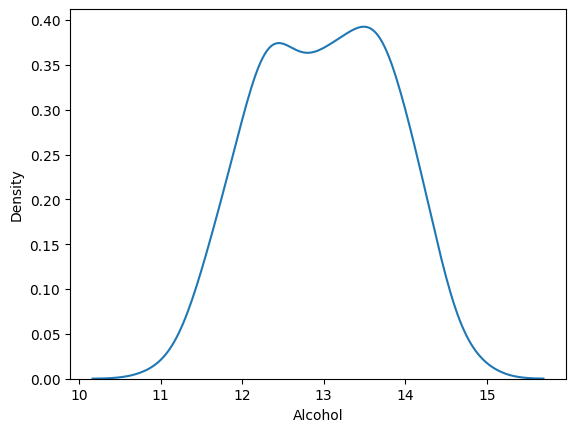

In [15]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

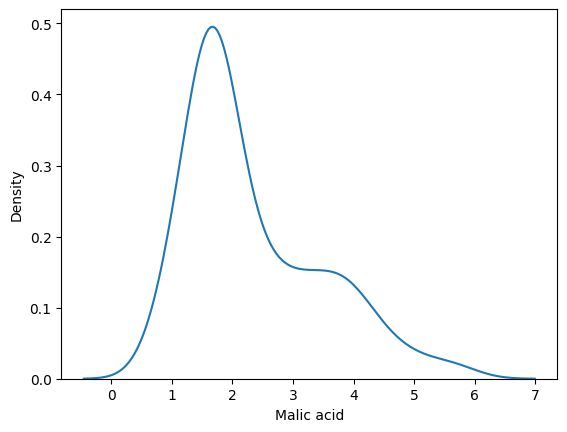

In [16]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

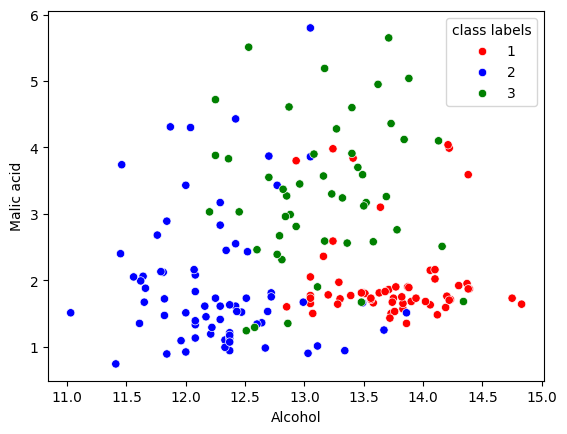

In [25]:
color_dict = {1:'red',2:'blue',3:'green'}
sns.scatterplot(x=df['Alcohol'], y=df['Malic acid'], hue=df['class labels'],palette=color_dict)

In [27]:
df.shape

(178, 3)

In [28]:
from sklearn.model_selection import train_test_split 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('class labels', axis=1),df['class labels'], test_size=0.3, random_state=0)

In [33]:
X_train.shape ,X_test.shape

((124, 2), (54, 2))

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
scaler.fit(X_train)

MinMaxScaler()

In [37]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [43]:
X_train_scaled.reset_index().describe()

AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

In [45]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [47]:
X_train_scaled.describe()   #ie min max sqiuze the data into o and 1 min=0 and max=1

,Alcohol,Malic acid
count,124.000000,124.000000
mean,0.525017,0.313805
std,0.215414,0.238802
min,0.000000,0.000000
25%,0.358199,0.150735
50%,0.540323,0.209034
75%,0.701613,0.495273
max,1.000000,1.000000


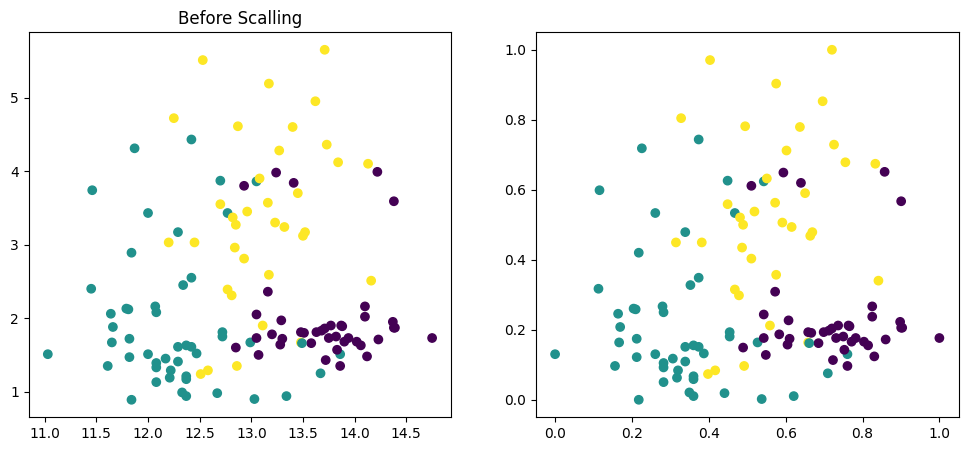

In [60]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(x=X_train['Alcohol'], y=X_train['Malic acid'],c=y_train)
ax1.set_title('Before Scalling', )

ax2.scatter(x=X_train_scaled['Alcohol'], y=X_train_scaled['Malic acid'],c=y_train)

<Axes: xlabel='Alcohol', ylabel='Density'>

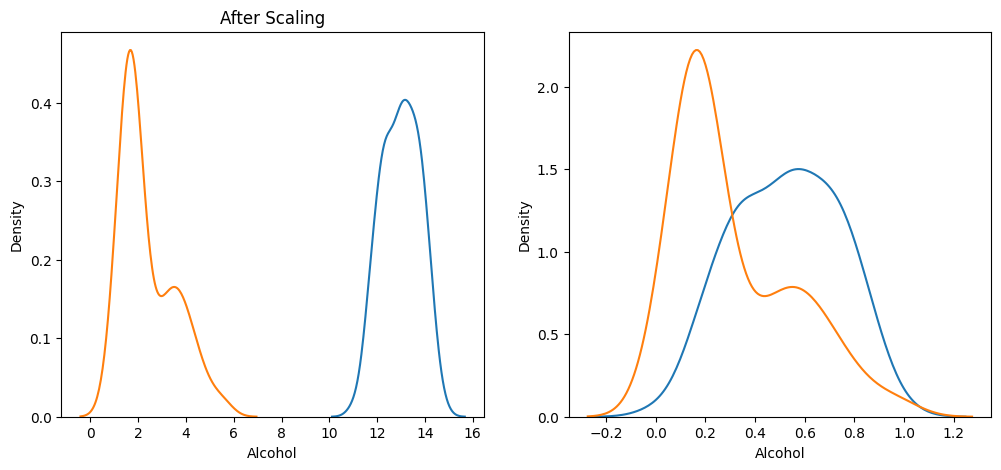

In [82]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scalling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

ax1.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)

# After normalization scale is changed the data distribution remains same 

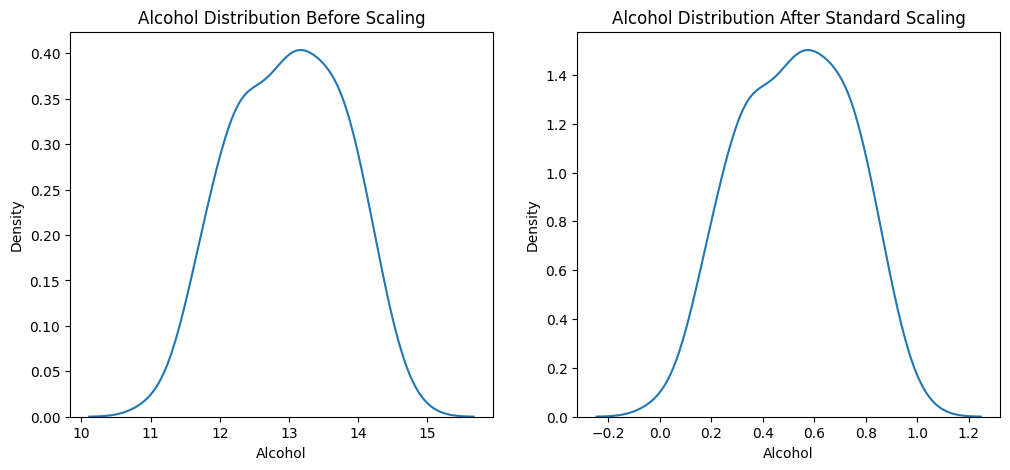

In [81]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

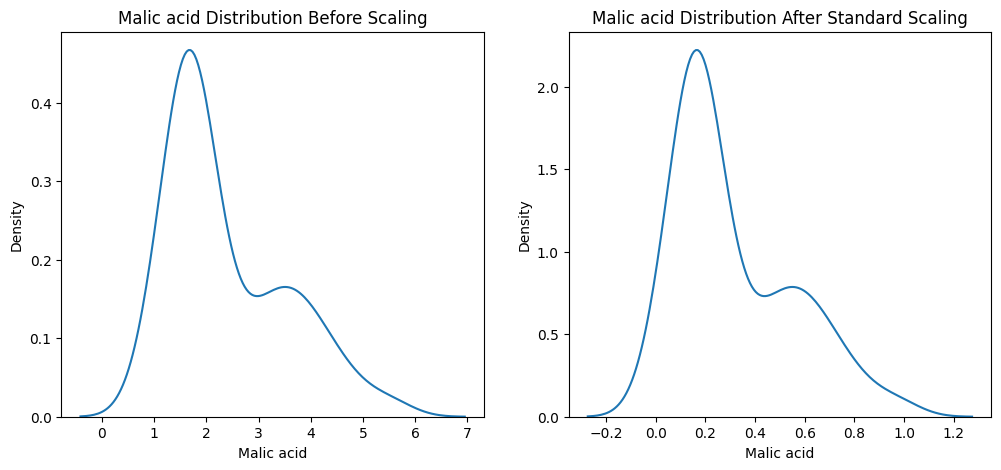

In [80]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

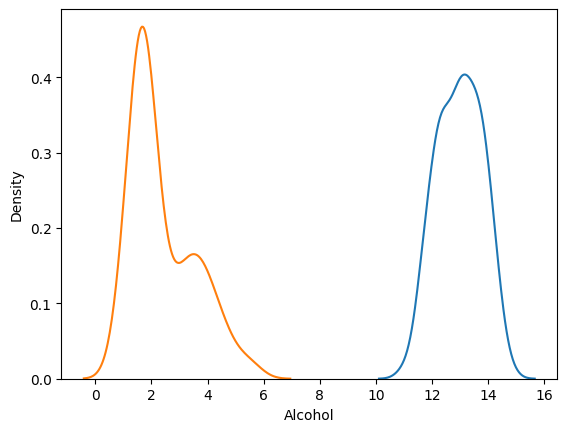

In [95]:
sns.kdeplot(X_train['Alcohol'],legend=True)
sns.kdeplot(X_train['Malic acid'],legend=True)
plt.show()